<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/gradient_descent_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression

In [2]:
#making our own dataset

X,y = make_regression(n_samples=4, n_features=1, n_informative = 1, n_targets = 1, noise=80, random_state = 13)

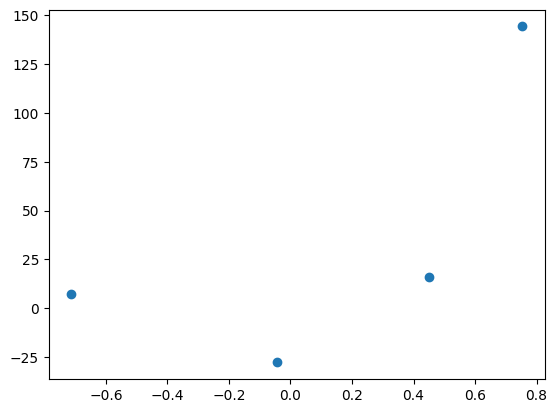

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [5]:
#lets apply OLS (Ordinary Least Square) using scikit-learn
#as to know slope and intercept value in advance

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [6]:
reg.coef_

array([78.35063668])

In [7]:
reg.intercept_

26.15963284313262

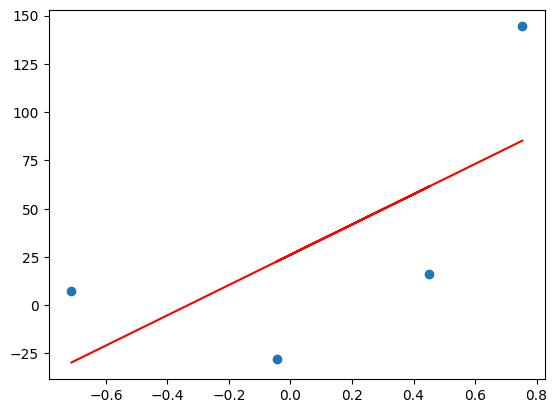

In [9]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red')

In [14]:
# Will write code to start with random value of b (intercept) and at the end will see reaching close to 26.1
# toh jo gradient descent sae line banega will be close to the red line in above diagram
# applying gradient descent assuming slope is constant m = 78.35
# and let's assume the starting value of b = 0 (and kisi bhi tareeke sae b ka value 26.1 pahuchana hai)

# for initial values of m and b (which means I have a line) will calculate all the y points (predicted) and plot them
y_pred = ((78.35 * X) + 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

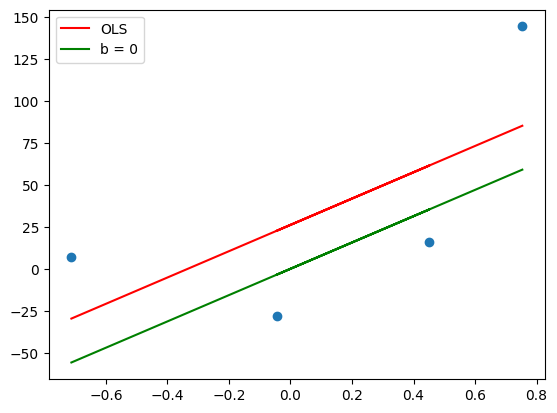

In [18]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'green', label = 'b = 0')
plt.legend()
plt.show()

In [21]:
# ab gradient descent apply karna hai and see that green line will gradually move towards red line,
# b ka value 26.1 ke paas jaane lagega and slope toh abhi constant hai

import numpy as np

m = 78.35
b = 0

# calculating slope at b = 0, in the formula for slope putting the values
loss_func_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_func_slope

-209.27763408209216

In [22]:
# let's take learning rate as lr = 0.1
lr = 0.1
step_size = lr*loss_func_slope
step_size

-20.927763408209216

In [23]:
# calculating the new intercept (b)
b = b - step_size
b

# now seedha 0 sae jump karke 20 par pahuch gaya hai intercept

20.927763408209216

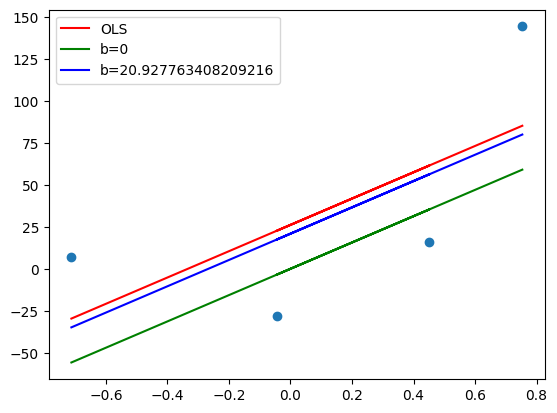

In [28]:
# now putting new value of b in the equation of line
y_pred1 = ((m*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'green', label = 'b=0')
plt.plot(X, y_pred1, color = 'blue', label = 'b={}'.format(b))
plt.legend()

In [30]:
# iteration 2
loss_func_slope = (-2) * np.sum(y - m*X.ravel() - b)
loss_func_slope

-41.85552681641843

In [31]:
step_size = lr*loss_func_slope
step_size

-4.185552681641844

In [32]:
b = b - step_size
b

25.11331608985106

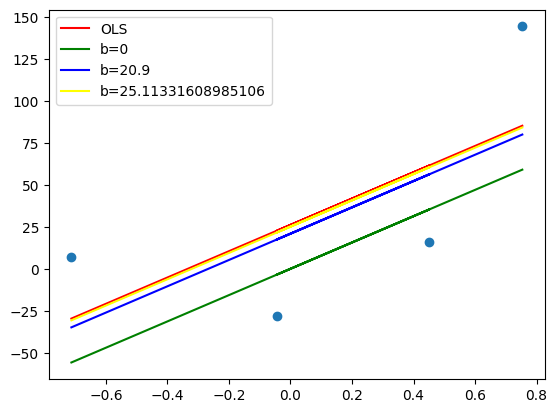

In [38]:
y_pred2 = (m*X + b).reshape(4)

plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'green', label = "b=0")
plt.plot(X, y_pred1, color = 'blue', label = 'b=20.9')
plt.plot(X, y_pred2, color = 'yellow', label = 'b={}'.format(b))
plt.legend()
plt.show()

# almost close to red line

In [39]:
# Iteration 3
loss_func_slope = (-2)*np.sum(y - m*X.ravel() - b)
loss_func_slope

-8.371105363283675

In [40]:
step_size = lr * loss_func_slope
step_size

# step_size chotta ho raha hai jaise jaise sahi answer ke paas pahuch rahe hai

-0.8371105363283675

In [41]:
b = b - step_size
b

25.95042662617943

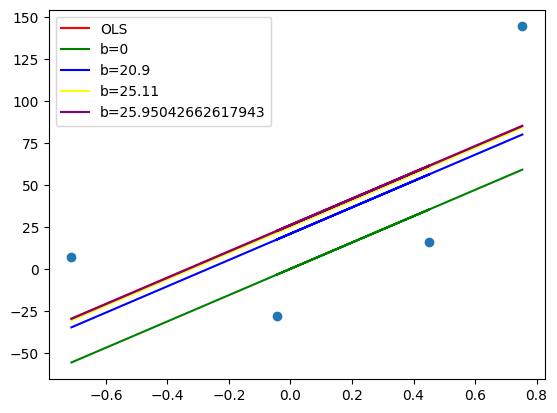

In [42]:
y_pred3 = (m*X + b).reshape(4)

plt.scatter(X,y)
plt.plot(X, reg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'green', label = "b=0")
plt.plot(X, y_pred1, color = 'blue', label = 'b=20.9')
plt.plot(X, y_pred2, color = 'yellow', label = 'b=25.11')
plt.plot(X, y_pred3, color = 'purple', label = 'b={}'.format(b))
plt.legend()
plt.show()

In [ ]:
# beauty of this algorithm is agar ek dum galat value/jyada value sae bhi start karein toh bhi ye sahi answer par pahuch jaayega
# there is a pattern agar bahut dur hote hain toh lambe lambe steps lae rahe hai aur jaise hi sahi answer ke close aate hai toh chotte chotte steps lene lagte
# hai - this is because of the learning rate

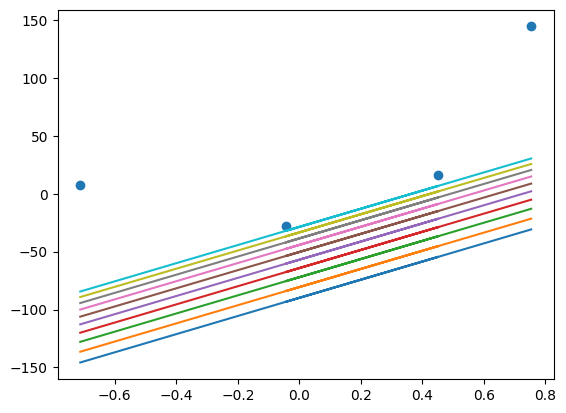

In [44]:
# going for a loop

b = -100
m = 78.35
epochs = 10
lr = 0.01

for i in range(epochs):
  loss_func_slope = (-2)*np.sum(y - m*X.ravel() - b)
  b = b - (lr*loss_func_slope)

  y_pred = m*X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

# bahut chote learning rates mtlb ho sakta hai sahi answer tak pahuch hi naa paayein

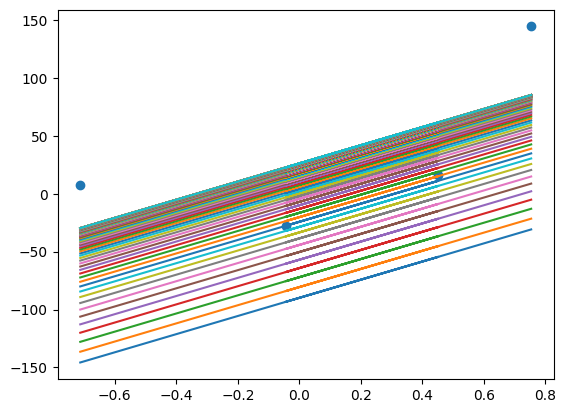

In [47]:
b = -100
m = 78.35
epochs = 100
lr = 0.01

for i in range(epochs):
  loss_func_slope = (-2)*np.sum(y - m*X.ravel() - b)
  b = b - (lr*loss_func_slope)

  y_pred = m*X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

# agar epochs badha dein toh pahuch jaayenge - shuru mai bade steps and last mai chotte chotte steps